In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import BinaryMFThresholdExWeighted
import pandas as pd
from generators import BlockMatrixGenerator, BlockDiagonalMatrixGenerator, SyntheticMatrixGenerator
from utils import show_matrix

## I. Check function F and dF by visualization
### 1. Load some data into the model
Just to assign bmf.U and bmf.V

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap      : [0.4 0.2 0.4 0.2]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


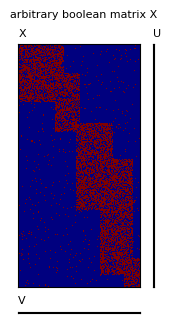

In [2]:
# generate arbitrary Boolean matrix (X)

from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.4, 0.2, 0.4, 0.2])
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.1, title='arbitrary boolean matrix X')

In [3]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

### 2. Instantiate bMF

In [9]:
eps=1e-06
lamda=5
max_iter=100
u, v = 0.1, 0.1

bmf = BinaryMFThresholdExWeighted(k=k, eps=eps, lamda=lamda, max_iter=max_iter, u=u, v=v)
bmf.fit(X_train, visualize=True, scaling=0.2, verbose=True)

[I] k            : 5
[I] algorithm    : threshold
[I] initial u, v : [0.1, 0.1]
[I] lamda        : 5
[I] eps          : 1e-06
[I] max_iter     : 100
[I] verbose      : True
[W] Missing validation data.
[I] k            : 5
[I] seed         : 1705444434
[I] init         : random
[I] max_iter     : 1000
[W] Missing validation data.
[I] After initialization: max U: 1.429, max V: 1.053
[I] After normalization: max U: 1.016, max V: 1.016
[W] Normalization failed. Re-try will help.
[I] iter: 0, start from [0.100, 0.100], search direction [0.680, 0.734]
[I] [I] Wolfe line search for iter   : 0
[I]     num of function evals made   : 3
[I]     num of gradient evals made   : 1
[I]     function value update        : 39326.756 -> 5357.503
[I]     threshold update             : [0.100, 0.100] -> [0.440, 0.467]
[I]     threshold difference         : 0.500
[I] iter: 1, start from [0.440, 0.467], search direction [-0.696, -0.718]
[I] [I] Wolfe line search for iter   : 1
[I]     num of function evals m

c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


### 3. Visualize F

100%|██████████| 100/100 [01:04<00:00,  1.54it/s]


Text(0.5, 0, 'z')

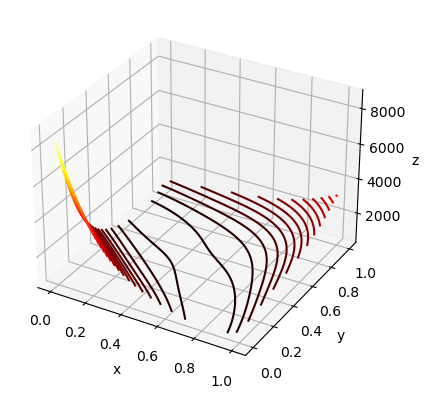

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

N = 100
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
Z = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in tqdm(range(N)):
    for j in range(N):
        Z[i, j] = bmf.F([X[i, j], Y[i, j]])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='hot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

100%|██████████| 100/100 [01:00<00:00,  1.66it/s]


Text(0.5, 0, 'z')

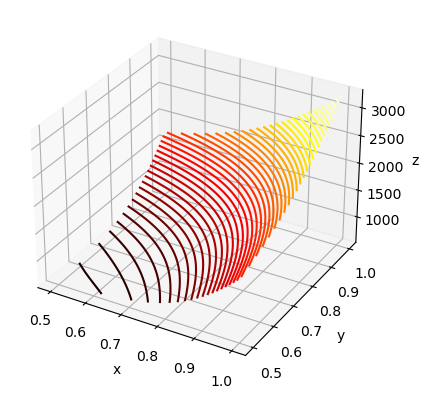

In [ ]:
N = 100
x = np.linspace(0.5, 1, N)
y = np.linspace(0.5, 1, N)
Z = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in tqdm(range(N)):
    for j in range(N):
        Z[i, j] = bmf.F([X[i, j], Y[i, j]])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='hot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

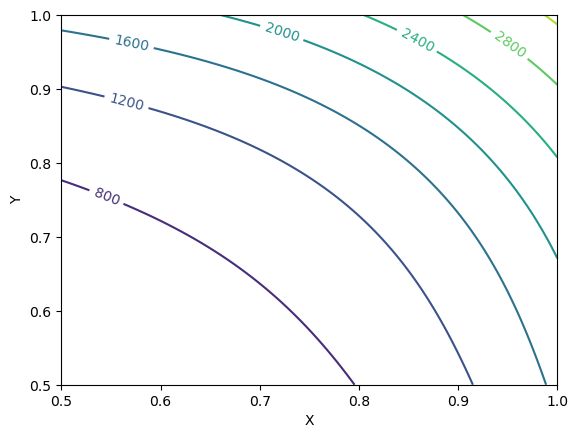

In [ ]:
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 4. Visualize dF

In [ ]:
N = 100
x = np.linspace(0.5, 1.2, N)
y = np.linspace(0.5, 1.2, N)
dx = np.zeros([N, N])
dy = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in tqdm(range(N)):
    for j in range(N):
        dx[i, j], dy[i, j] = bmf.dF([X[i, j], Y[i, j]])

        # re-scale
        # k = 5 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
        # dx[i, j] *= k
        # dy[i, j] *= k


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


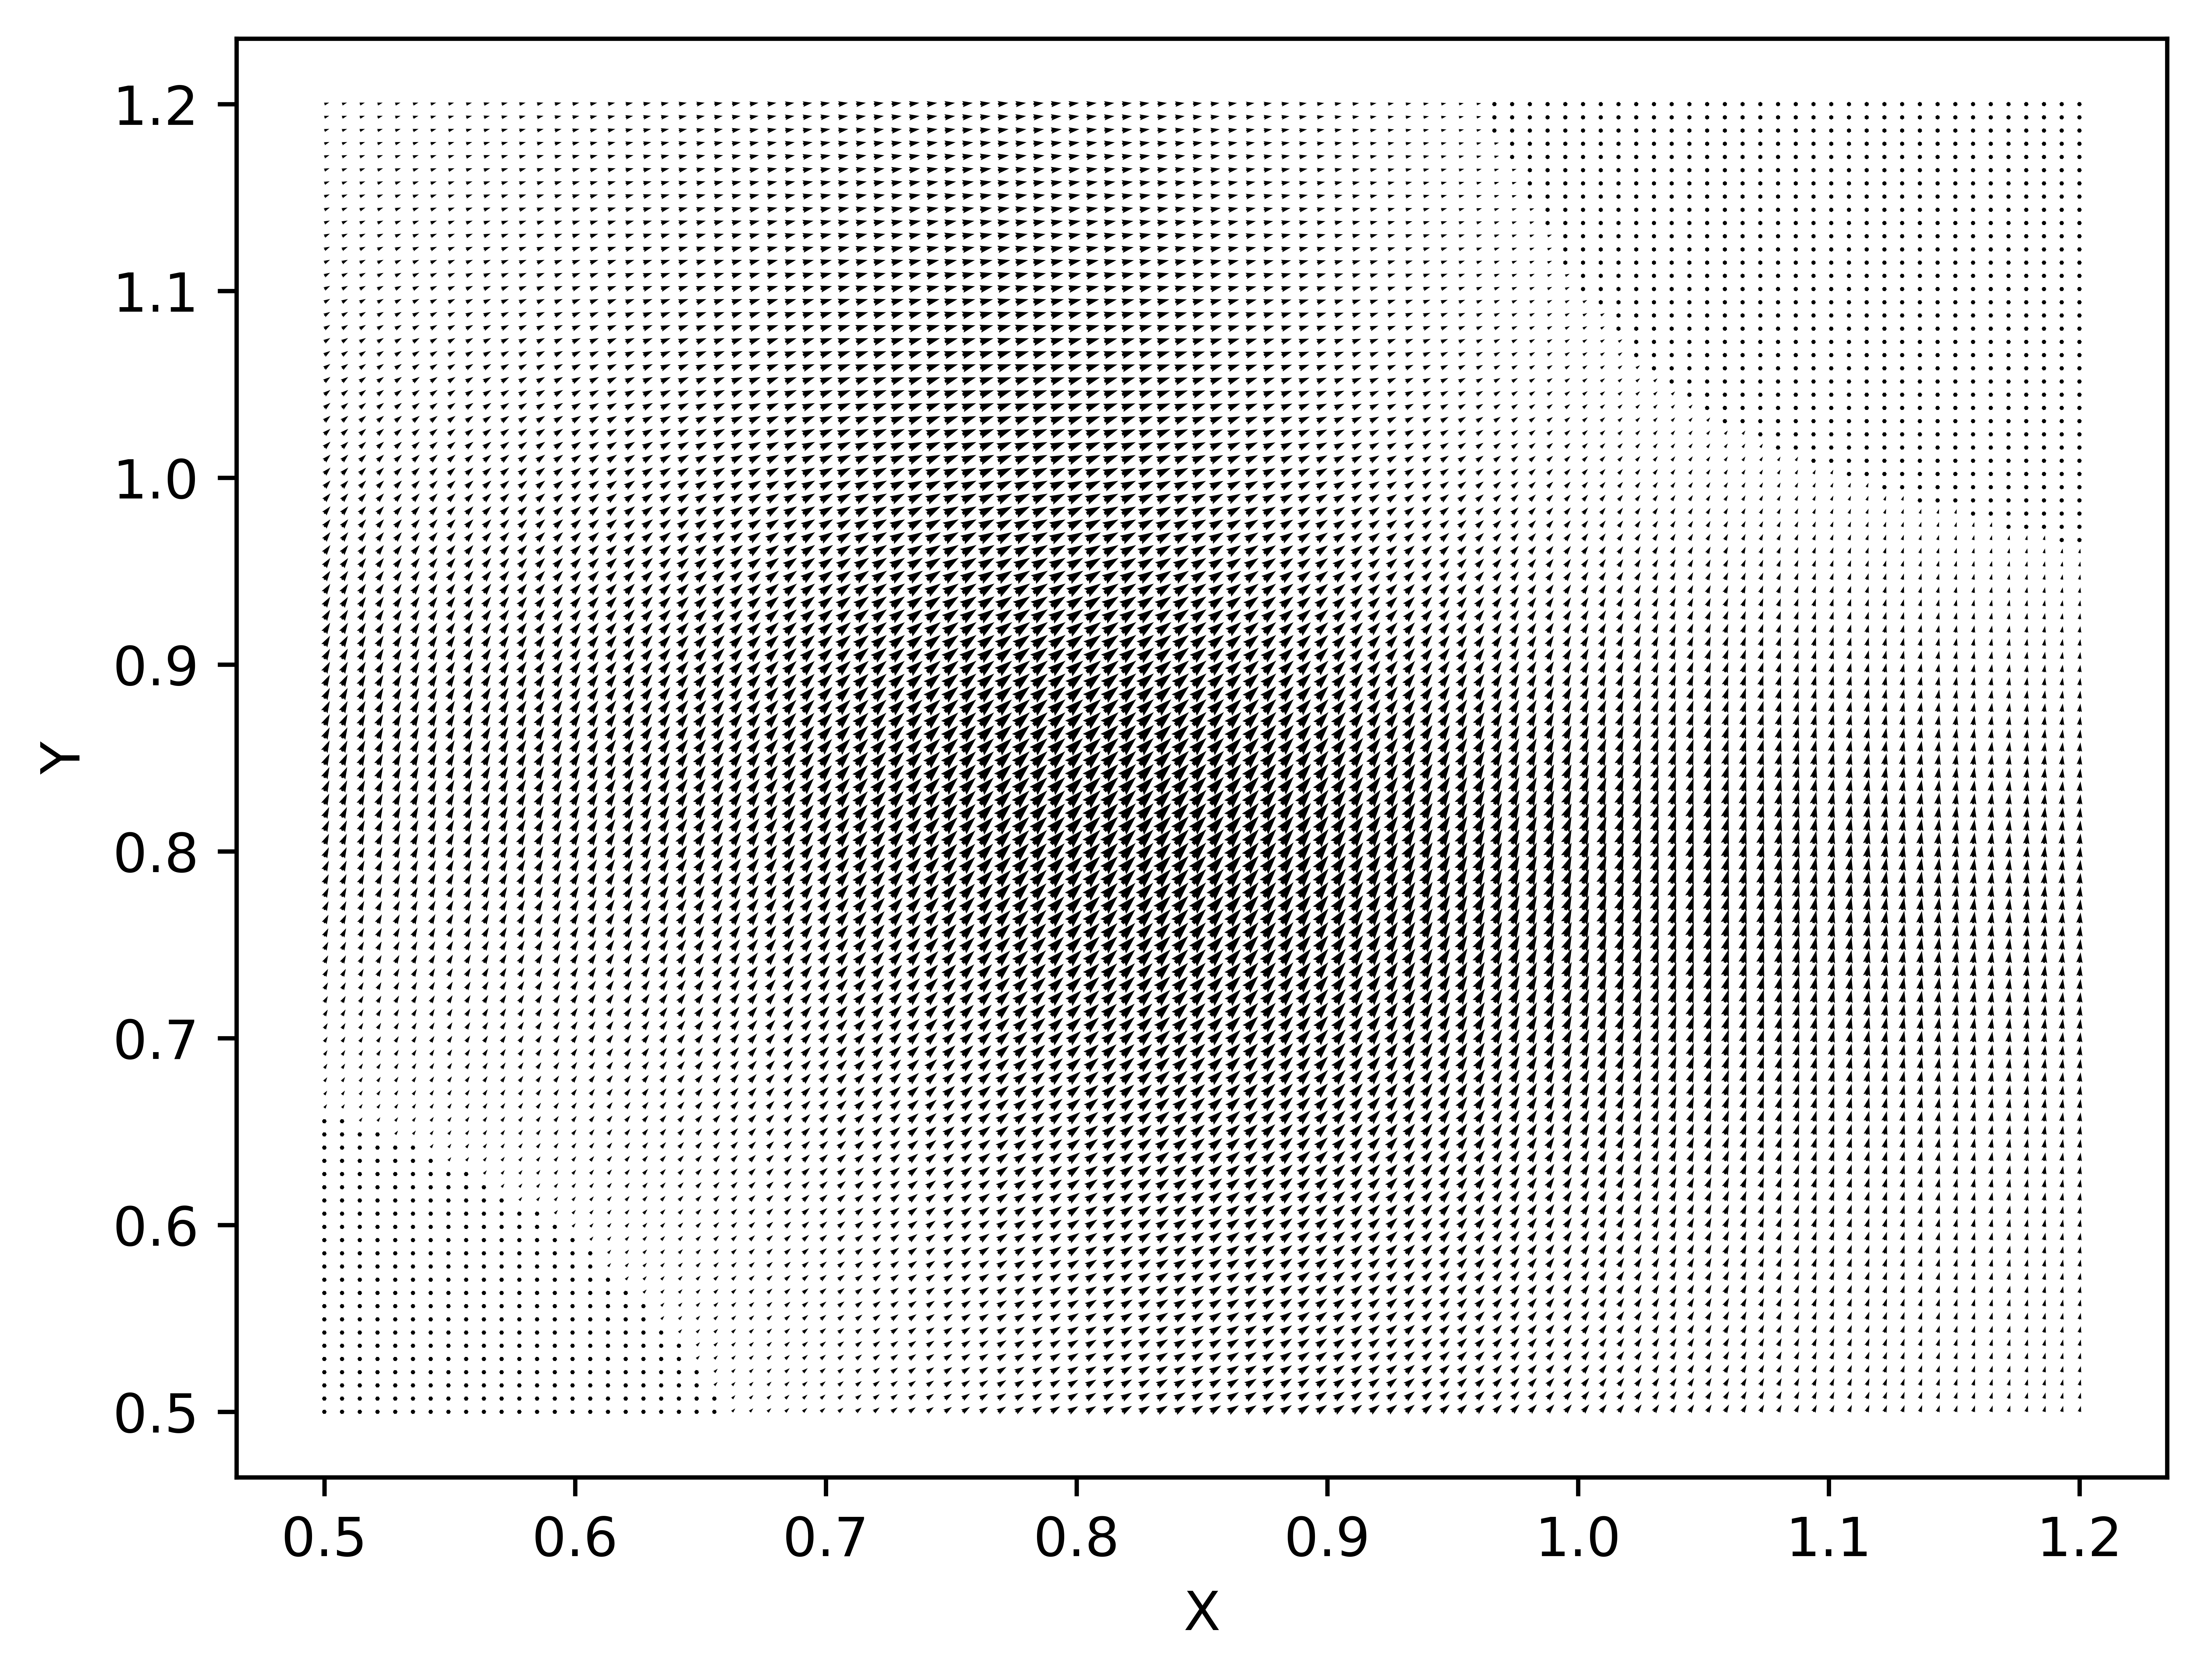

In [ ]:
plt.figure(dpi=1200) 
fig = plt.quiver(X, Y, dx, dy)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()